# Explore here

In [2]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# 1) Connect to the database here using the SQLAlchemy's create_engine function

# 2) Execute the SQL sentences to create your tables using the SQLAlchemy's execute function

# 3) Execute the SQL sentences to insert your data using the SQLAlchemy's execute function

# 4) Use pandas to print one of the tables as dataframes using read_sql function

True

PASO 3


In [3]:
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

PASO 4


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [7]:
artist_id = "3eqjTLE0HfPfh78zjh6TqT"

response = con.artist_top_tracks("3eqjTLE0HfPfh78zjh6TqT")
if response:
   tracks = response["tracks"]
   tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [10]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df)

   duration_ms                                               name  popularity
9     4.443550                                      Secret Garden          66
8     5.025767                                          The River          67
6     3.324217                                       Hungry Heart          72
7     4.245550                                         Glory Days          72
5     4.498667                                        Born to Run          74
3     4.644667                                 Born in the U.S.A.          75
4     3.251333              Streets of Philadelphia - Single Edit          75
2     2.598000                                        I'm On Fire          78
0     4.460000  Santa Claus Is Comin' to Town - Live at C.W. P...          81
1     4.021767                                Dancing In the Dark          81


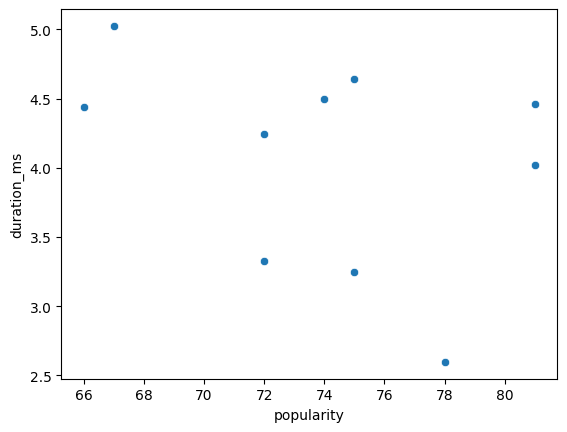

In [13]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

Comprobando el gráfico realizado, no existe ningun tipo de correlación entre la popularidad y la duracion de las 10 mejores canciones de Bruce Springsteen